# Tree, overfitting

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Données générées

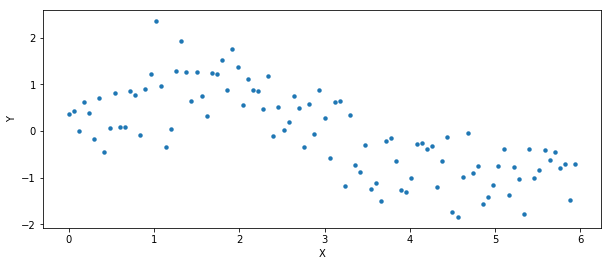

In [ ]:
import numpy, numpy.random, math
def generate_data(n):
    import matplotlib.pyplot as plt
    X = numpy.arange(n)/n*6
    mat = numpy.random.normal(size=(n, 1))/2
    si = numpy.sin(X).reshape((n, 1))
    Y = mat + si
    X = X.reshape((n,1))
    data = numpy.hstack((X, Y))
    return data, X, Y
import pandas
data, X, Y = generate_data(100)
df = pandas.DataFrame(data, columns=["X", "Y"])
df.plot(x="X", y="Y", kind="scatter", figsize=(10,4))

## Différents arbres de décision

### max_depth

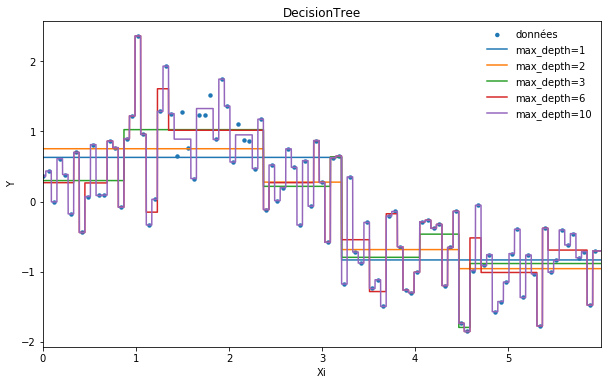

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="DecisionTree")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = DecisionTreeRegressor(max_depth=max_depth)
    clr.fit(X, Y)
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)    

### min_samples_split=10

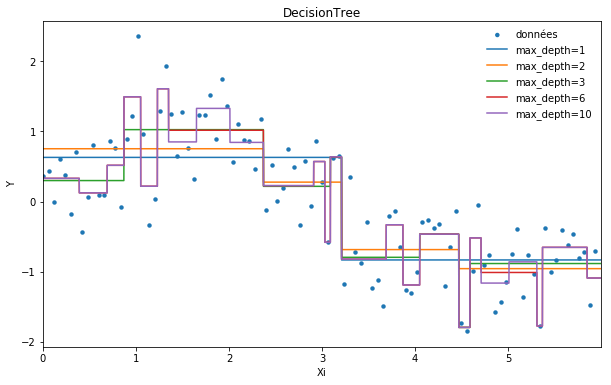

In [ ]:
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="DecisionTree")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=10)
    clr.fit(X, Y)
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)  

## Random Forest

### max_depth

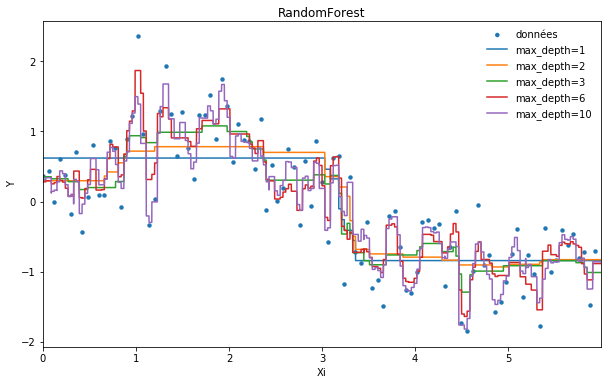

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = RandomForestRegressor(max_depth=max_depth)
    clr.fit(X, Y.ravel())
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)  

### n_estimators

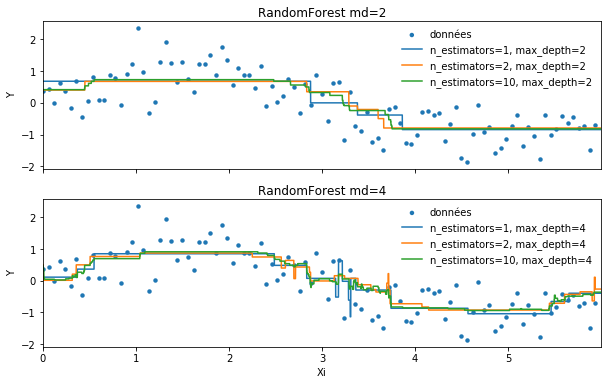

In [ ]:
from sklearn.ensemble import RandomForestRegressor
f, axarr = plt.subplots(2, sharex=True)
df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest md=2", ax=axarr[0])
df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest md=4", ax=axarr[1])
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for i, max_depth in enumerate([2, 4]):
    for n_estimators in [1, 2, 10]:
        clr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        clr.fit(X, Y.ravel())
        pred = clr.predict(Xi)
        ex = pandas.DataFrame(Xi, columns=["Xi"])
        ex["pred"] = pred
        ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", 
                                  label="n_estimators=%d, max_depth=%d" % (n_estimators, max_depth), ax=axarr[i])  

### min_samples_split=10

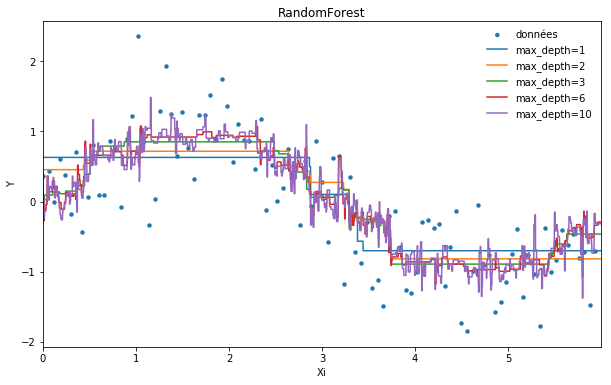

In [ ]:
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = RandomForestRegressor(max_depth=max_depth, min_samples_split=10)
    clr.fit(X, Y.ravel())
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)

## Base d'apprentissage et et base de test

### Decision Tree

In [ ]:
data, X, Y = generate_data(1000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

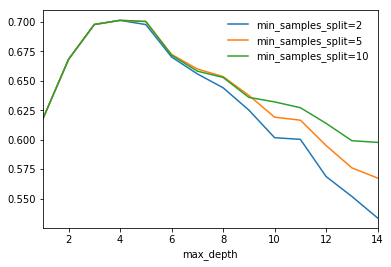

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
min_samples_splits = [2, 5, 10]
rows = []
for max_depth in range(1, 15):
    d = dict(max_depth=max_depth)
    for min_samples_split in min_samples_splits:
        clr = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        clr.fit(X_train, y_train)
        pred = clr.predict(X_test)
        score = r2_score(y_test, pred)
        d["min_samples_split=%d" % min_samples_split] = score
    rows.append(d)
pandas.DataFrame(rows).plot(x="max_depth", y=["min_samples_split=%d" % _ for _ in min_samples_splits])

### Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
rows = []
for n_estimators in range(1, 10):
    for max_depth in range(1, 10):
        for min_samples_split in [2, 5, 10]:
            clr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
            clr.fit(X_train, y_train.ravel())
            pred = clr.predict(X_test)
            score = r2_score(y_test, pred)
            d = dict(max_depth=max_depth)            
            d["n_estimators"] = n_estimators
            d["min_samples_split"] = min_samples_split
            d["score"] = score
            rows.append(d)
pl = pandas.DataFrame(rows)      
pl.head()

,max_depth,min_samples_split,n_estimators,score
0,1,2,1,0.616434
1,1,5,1,0.617189
2,1,10,1,0.617583
3,2,2,1,0.669095
4,2,5,1,0.614635


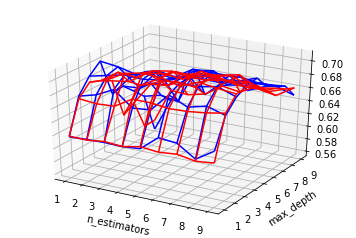

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for v, c in [(2, "b"), (10, "r")]:
    piv = pl[pl.min_samples_split==v].pivot("n_estimators", "max_depth", "score")
    pivX = piv.copy()
    pivY = piv.copy()
    for v in piv.columns: pivX.ix[:, v] = piv.index
    for v in piv.index: pivY.ix[v, :] = piv.columns
    ax.plot_wireframe(pivX.as_matrix(), pivY.as_matrix(), piv.as_matrix(), color=c)
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")

### Réseaux de neurones

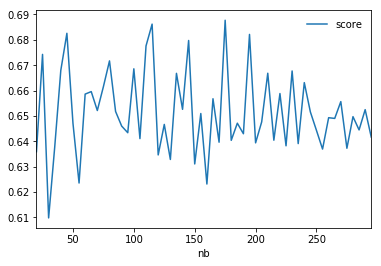

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
min_samples_splits = [2, 5, 10]
rows = []
for nb in range(20, 300, 5):
    clr = MLPRegressor(hidden_layer_sizes=(nb,), activation="relu")
    clr.fit(X_train, y_train.ravel())
    pred = clr.predict(X_test)
    score = r2_score(y_test, pred)
    if score > 0:
        d = dict(nb=nb, score=score)
        rows.append(d)
pandas.DataFrame(rows).plot(x="nb", y=["score"])

### Réseaux de neurones, alpha=0

c:\python35_x64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


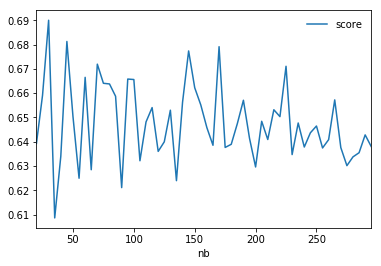

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
min_samples_splits = [2, 5, 10]
rows = []
for nb in range(20, 300, 5):
    clr = MLPRegressor(hidden_layer_sizes=(nb,), activation="relu", alpha=0, tol=1e-6)
    clr.fit(X_train, y_train.ravel())
    pred = clr.predict(X_test)
    score = r2_score(y_test, pred)
    if score > 0:
        d = dict(nb=nb, score=score)
        rows.append(d)
pandas.DataFrame(rows).plot(x="nb", y=["score"])

## Exercice 1 : déterminer les paramètres optimaux pour cet exemple

A vérifier avec [grid_search](http://scikit-learn.org/stable/modules/grid_search.html), [hyperopt](https://github.com/hyperopt/hyperopt-sklearn), [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html).

## Exercice 2 : ajouter quelques points aberrants